In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.image as mpimg
from matplotlib import cm
from matplotlib import rcParams
import sys
import time
import scipy
import pandas as pd
import numpy as np
import math
import cmath
import json
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits  # We use fits to open the actual data file
from scipy import stats
import csv
import os
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import sklearn.cluster
from scipy.signal import savgol_filter
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
import skimage
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import tools21cm as t2c
import seaborn as sns
from decimal import *
import string
import pickle
import time


def load_binary_data(filename, dtype=np.float32): 
    """ 
    We assume that the data was written 
    with write_binary_data() (little endian). 
    """ 
    f = open(filename, "rb") 
    data = f.read() 
    f.close() 
    _data = np.fromstring(data, dtype) 

    return _data


Directory changed


# Run simulations

In [ ]:
tvir = np.linspace(4.,6.,num=21)
zeta = np.linspace(25,45,num=5)
rmfp = np.linspace(5.,25.,num=11)

In [ ]:
#make simu

import time

TWOPLACES = Decimal(10) ** -2       # same as Decimal('0.01')
FOURPLACES = Decimal(10) ** -4       # same as Decimal('0.0001')
SIXPLACES = Decimal(10) ** -6       # same as Decimal('0.000001')

ncells = 128
boxsize = 256

# #zeta = np.linspace(0,250,num=26)
# #zeta[0]+=1
# zeta = [250]
# tvir = [4.0]#np.linspace(4.0,6.,num=21)
# #print tvir
# rmfp = [5]#np.linspace(5.,25.,num=11)

tvir = [4.7]#np.linspace(4.,6.,num=21)
zeta = [30]#np.linspace(25,45,num=5)
rmfp = [15]#np.linspace(5.,25.,num=11)
z_arr = [10.]
#zeta[0]+=1
number_redshifts = len(z_arr)

print zeta
for i in zeta:
    for j in tvir:
        for k in rmfp:
            nf_vals = np.zeros(len(z_arr) + 2)
            params = np.array([i, j, k])
            Individual_ID = Decimal(repr(params[0])).quantize(SIXPLACES)
            Individual_ID_2 = Decimal(repr(params[1])).quantize(SIXPLACES)

             
        
            StoredStatisticalData = []
            StoredStatisticalData_Error = []
            StoredFileLayout = []
            StoredFileLayout_Error = []

            LightConeFlag = 0

            separator = " "
            separator_other = "_"
            seq = []
            # Add the random thread ID
            seq.append("%s"%(Individual_ID))
            # Add the second ID
            seq.append("%s"%(Individual_ID_2))

            StringArgument_other = string.join(seq,separator_other)

            seq.append("%s"%(number_redshifts))
            # Add light cone flag
            seq.append("%s"%(LightConeFlag))
            
            seq.append("0")
            seq.append("6")

            seq.append("0")

            StringArgument = string.join(seq,separator)
            GenerateNewICs = 0

            Subcell_RSDs = 0

            IONISATION_FCOLL_TABLE = 0

            UseFcollTable = 0

            PerformTsCalc = 0

            INHOMO_RECO = 0

            OutputGlobalAve = 1

            parameter_number = 0
            create_file = open("Walker_%s.txt"%(StringArgument_other),"w")
            create_file.write("FLAGS    %s    %s    %s    %s    %s    %s    %s\n"\
                              %(GenerateNewICs,Subcell_RSDs,IONISATION_FCOLL_TABLE,UseFcollTable,\
                                PerformTsCalc,INHOMO_RECO,OutputGlobalAve))

            create_file.write("F_STAR10    -1.045757491\n")

            create_file.write("ALPHA_STAR    0.5\n")

            create_file.write("F_ESC10    -1.301029996\n")

            create_file.write("ALPHA_ESC    -0.5\n")

            create_file.write("M_TURN    8.69897\n")

            create_file.write("t_STAR    0.8\n")

            create_file.write("ZETA    %s\n"%(Decimal(repr(params[0])).quantize(SIXPLACES)))

            create_file.write("MFP    %s\n"%(Decimal(repr(params[2])).quantize(SIXPLACES)))

            create_file.write("TVIR_MIN    %s\n"%(Decimal(repr(params[1])).quantize(SIXPLACES)))
            X_RAY_TVIR_MIN = params[1]

            create_file.write("L_X    40.5\n")

            create_file.write("NU_X_THRESH    500.0\n")

            create_file.write("NU_X_BAND_MAX    2000.0\n")
            create_file.write("NU_X_MAX    10000.0\n")

            create_file.write("X_RAY_SPEC_INDEX    1.0\n")

            create_file.write("X_RAY_TVIR_MIN    %s\n"%(Decimal(repr(X_RAY_TVIR_MIN)).quantize(SIXPLACES)))

            create_file.write("X_RAY_TVIR_LB    4.0\n")
            create_file.write("X_RAY_TVIR_UB    6.0\n")

            create_file.write("N_RSD_STEPS    20\n")
            create_file.write("LOS_direction    2\n")

            for ii in range(number_redshifts):
                create_file.write("CO-EVAL-Z    %s\n"%(Decimal(repr(z_arr[ii])).quantize(SIXPLACES)))        

            create_file.close() 


        # Now create the cosmology file associated with this walker.
            create_file = open("WalkerCosmology_%s.txt"%(StringArgument_other),"w")

            create_file.write("RANDOM_SEED    %s\n"%(Decimal(repr(1.0)).quantize(SIXPLACES)))

            create_file.write("SIGMA_8    0.810000\n")

            create_file.write("hubble    0.678000\n")

            create_file.write("Omega_M    0.308000\n")

            create_file.write("Omega_L    0.692000\n")

            create_file.write("Omega_b    0.048\n")

            create_file.write("ns    0.968000\n")

            create_file.close()
            
            command = "./drive_21cmMC_streamlined %s"%(StringArgument)
            print command
            start_time = time.time()

            os.system(command)
            print("--- %s seconds ---" % (time.time() - start_time))
#             command = "mkdir models/%1.1f_%1.1f_%1.1f"%(i,j,k)
#             os.system(command)
            curnf = np.zeros(3)
            number_redshifts = len(z_arr)
            for ii in range(number_redshifts): 
                start_time = time.time()

                z = z_arr[ii]
                name = 'delta_T_%s_z%1.6f_128_250Mpc'%(StringArgument_other,z_arr[ii])

                data = load_binary_data(name)
                data = data.reshape((int(ncells), int(ncells), int(ncells)), order='C')
                data.shape = (int(ncells), int(ncells), int(ncells))
                data_th = data < 1.
                hdu = fits.PrimaryHDU(data_th.astype('uint8'))
                hdul = fits.HDUList([hdu])
                hdul.writeto('ref_z%1.6f.fits'%(z), overwrite='true')
                
               # z = z_arr[ii]
                uv_map = np.loadtxt('NoiseData/UVmap_SKA/128/uv_map_z%1.6f.txt'%(z), ndmin=2)

                noise = fits.open('NoiseData/Noise_map_ska/noise_arr_%1.6f.fits'%z_arr[ii])[0].data
                name ='models/%1.1f_%1.1f_%1.1f/NeutralFraction_%1.6f_%1.6f_%1.6f.txt'%(i,j,k,i,j,z_arr[ii])
                #f = open(name+'.txt', "r")
                orinf = np.loadtxt(name)

#                 if(orinf >0.94):
#                newdata2 = np.ones((int(ncells), int(ncells), int(ncells)))
#                 elif(orinf <0.06):
#                     newdata2 = np.ones((int(ncells), int(ncells), int(ncells)))
#                 else:
#                     if( i > 10):
#                         continue
                max_baseline = 2.
                output_dtheta  = (1+float(z))*21e-5/max_baseline
                output_ang_res = output_dtheta*t2c.cm.z_to_cdist(float(z)) \
                                 * ncells/(float(boxsize))

                kernel = t2c.gauss_kernel(ncells, sigma=1., fwhm=output_ang_res)
                kernelfft = np.fft.fft2(np.fft.ifftshift(kernel))
                kernelfft[uv_map == 0] = 0
                uv_map = kernelfft

                data_dtb_smo = np.zeros((data.shape))


                for iii in range(ncells):                                                 
                    data_dtb_smo[:,:,iii] =np.real(np.fft.ifft2(np.multiply(np.fft.fft2(data[:,:,iii]+noise[:,:,iii]), \
                                                                   uv_map/np.max(uv_map))))    


                output_met1 = data_dtb_smo#np.zeros(data.shape)


                kernel = t2c.tophat_kernel(ncells, output_ang_res)
                for iii in range(ncells):
                     output_met1[iii,:,:] =t2c.smooth_with_kernel(data_dtb_smo[iii,:,:], kernel)


                img = output_met1.astype(float)

                allth=[]
                for iii in range(ncells):
                    th = skimage.filters.threshold_triangle(img[:,:,iii])
                    allth.append(th)

                newdata2 = img < np.median(allth)


                curnf[ii] = 1. - np.count_nonzero(newdata2.astype(float)) / float(ncells**3)
                print orinf, curnf[ii]
                
                if(abs(orinf - curnf[ii])>0.25 or orinf > 0.98 or orinf < 0.02):
                    if(orinf >0.8):
                        newdata2 = np.zeros((int(ncells), int(ncells), int(ncells)))
                    elif(orinf <0.2):
                         newdata2 = np.ones((int(ncells), int(ncells), int(ncells)))
                curnf[ii] = 1. - np.count_nonzero(newdata2.astype(float)) / float(ncells**3)
                print orinf, curnf[ii]
                print 

                hdu = fits.PrimaryHDU(newdata2.astype('uint8'))
                hdul = fits.HDUList([hdu])
                hdul.writeto('obs_z%1.6f.fits'%(z), overwrite='true')

#                 command = "mpirun -np 1 ./../../../disccoman/disccoman -g 1,1,1 -l 2 --intype fits \
#                 --attribute 4 -c 26   --threads 1   -f eor --eor hii   \
#                 --inprefix  ref_z%1.6f --outprefix models/%1.1f_%1.1f_%1.1f/ref_hii_z%1.6f \
#                 -v info "%(z_arr[ii],i,j,k,z_arr[ii])
#                 os.system(command)  
                start_time2 = time.time()

                command = "mpirun -np 1 ./../../../disccoman/disccoman -g 1,1,1 -l 2 --intype fits \
                --attribute 4 -c 26   --threads 1   -f eor --eor hii   \
                --inprefix obs_z%1.6f --outprefix obs_hii_z%1.6f \
                -v info "%(z_arr[ii],z_arr[ii])
                os.system(command)  
                print("--- %s seconds ---" % (time.time() - start_time))
                print("--- %s seconds ---" % (time.time() - start_time2))

                name = 'models/%1.1f_%1.1f_%1.1f/delta_T_%s_z%1.6f_128_250Mpc'%(i,j,k,StringArgument_other,z_arr[ii])
                command = 'rm %s'%name 
                os.system(command)
            np.savetxt('models/%1.1f_%1.1f_%1.1f/xh_recov.txt'%(i,j,k), curnf)
            command = "rm ref_z*"
            os.system(command)  
        
            #command = "rm obs_z*"
            #os.system(command)  
#             command = "rm delta_T*"
#             os.system(command) 

#             command = "mv Ave* models/%1.1f_%1.1f_%1.1f/"%(i,j,k)
#             os.system(command)        

#             command = "mv Neutral* models/%1.1f_%1.1f_%1.1f/"%(i,j,k)
#             os.system(command)  

#             command = "mv delTps* models/%1.1f_%1.1f_%1.1f/"%(i,j,k)
#             os.system(command)  

#             command = "mv Walker* models/%1.1f_%1.1f_%1.1f/"%(i,j,k)
#             os.system(command)  
# #            break;
#         break;
#     break;


# Make contour plots

In [ ]:
#Data 
data_cur = []
vol_lim = 10
TWOPLACES = Decimal(10) ** -2       # same as Decimal('0.01')
FOURPLACES = Decimal(10) ** -4       # same as Decimal('0.0001')
SIXPLACES = Decimal(10) ** -6       # same as Decimal('0.000001')

ncells = 128
boxsize = 256

zeta = np.linspace(0,250,num=51)
#print zeta
tvir = np.linspace(4.,6.,num=21)
rmfp = np.linspace(5.,25.,num=11)
z_arr = [8.,9.,10.]
Directory = 'MockObs/mock_new/'
inprefix = 'obs_hii_z'
multi = 1
data_nbub = np.zeros(3)
data_ave = np.zeros((3,5))
zeta[0]+=1
print zeta
for ii in range(len(z_arr)):
    name =Directory+inprefix+'%1.6f'%z_arr[ii]
    f = open(name+'_vol.bin', "r")
    volume = np.fromfile(f, dtype=np.uint64)*2

    f = open(name+'_elong.bin', "r")
    all_e = np.fromfile(f, dtype=np.float)

    f = open(name+'_flat.bin', "r")
    all_f = np.fromfile(f, dtype=np.float)
    
    f = open(name+'_spars.bin', "r")
    all_s = np.fromfile(f, dtype=np.float)
    
    f = open(name+'_ncomp.bin', "r")
    all_n = np.fromfile(f, dtype=np.float)

    good = volume > vol_lim
    data_nbub[ii]= len(volume[good])
    
    volume = volume[good]
    all_e = all_e[good]
    all_f = all_f[good]
    all_s = all_s[good]
    all_n = all_n[good]
    data_cur.append( zip(np.log10(volume), all_e, all_f, all_s, all_n) )
    #data_all.append(zip(np.log10(volume), np.ones(len(volume))))
    data_ave[ii] = np.mean(data_cur[ii], axis = 0)

total_bub = np.zeros((len(zeta), len(tvir), len(rmfp),3))
model_ave = np.zeros((len(zeta), len(tvir), len(rmfp),3,5))
model_indiv = np.zeros((len(zeta), len(tvir), len(rmfp),3,5))
model_maha = np.zeros((len(zeta), len(tvir), len(rmfp),3))

ave_spar = np.zeros((3,len(zeta), len(tvir), len(rmfp)))
ave_ncom = np.zeros((3,len(zeta), len(tvir), len(rmfp)))
ave_elon = np.zeros((3,len(zeta), len(tvir), len(rmfp)))
ave_flat = np.zeros((3,len(zeta), len(tvir), len(rmfp)))
ave_vol = np.zeros((3,len(zeta), len(tvir), len(rmfp)))

Directory = 'models'
for i in range(len(zeta)):
    print i
    for j in range(len(tvir)):
        for k in range(len(rmfp)):
            model_cur = [] 

            for l in range(len(z_arr)):

                name =Directory+'/%1.1f_%1.1f_%1.1f/obs_hii_z%1.6f'%(zeta[i],tvir[j],rmfp[k],z_arr[l])
                f = open(name+'_vol.bin', "r")
                volume = np.fromfile(f, dtype=np.uint64)*2
                
                f = open(name+'_elong.bin', "r")
                all_e = np.fromfile(f, dtype=np.float)

                f = open(name+'_flat.bin', "r")
                all_f = np.fromfile(f, dtype=np.float)

                f = open(name+'_spars.bin', "r")
                all_s = np.fromfile(f, dtype=np.float)

                f = open(name+'_ncomp.bin', "r")
                all_n = np.fromfile(f, dtype=np.float)

                good = volume > vol_lim
                volume = volume[good]
                all_e = all_e[good]
                all_f = all_f[good]
                all_s = all_s[good]
                all_n = all_n[good]

                total_bub[i][j][k][l] =  len(volume)

                model_cur.append( zip(np.log10(volume), all_e, all_f, all_s, all_n) )
                model_ave[i][j][k][l] = np.nanmean(model_cur[l], axis = 0)
               # print model_ave[i][j][k][l]
                if (len(volume) == 0):
                    total_bub[i][j][k][l] = 'nan'



In [3]:
tot_bub_10 = total_bub
model_ave_10 = model_ave 

In [75]:
#test
boxsize = 256

zeta = np.linspace(10,250,num=25)
tvir = np.linspace(4.,6.,num=21)
rmfp = np.linspace(5.,25.,num=11)
z_arr = [8.,9.,10.]
Directory = 'models/'
inprefix = 'obs_hii_z'
xhtocomp = [0.6, 0.782, 0.881]
zeta_obs = []
tvir_obs = []
for i in range(len(zeta)):
    for j in range(len(tvir)):
        for k in range(len(rmfp)):
            ok = 1

            for l in range(len(z_arr)):

                name =Directory+'/%1.1f_%1.1f_%1.1f/NeutralFraction_%1.6f_%1.6f_%1.6f.txt'%(zeta[i],tvir[j],rmfp[k],zeta[i],tvir[j],z_arr[l])
                #f = open(name+'.txt', "r")
                curnf = np.loadtxt(name)
                #print zeta[i], tvir[j], curnf, xhtocomp[l]
                if(abs(curnf-xhtocomp[l])/xhtocomp[l]>0.3):
                    #print abs(curnf-xhtocomp[l])/xhtocomp[l]
                    ok = 0

            if ok == 1:
                zeta_obs.append(zeta[i])
                tvir_obs.append(tvir[j])
                
#print tvir_obs

In [4]:
bub_diff = np.zeros((len(zeta), len(tvir), len(rmfp)))
spa_diff = np.zeros((len(zeta), len(tvir), len(rmfp)))
nco_diff = np.zeros((len(zeta), len(tvir), len(rmfp)))
elo_diff = np.zeros((len(zeta), len(tvir), len(rmfp)))
fla_diff = np.zeros((len(zeta), len(tvir), len(rmfp)))
vol_diff = np.zeros((len(zeta), len(tvir), len(rmfp)))
maha_diff = np.zeros((len(zeta), len(tvir), len(rmfp)))
for i in range(len(zeta)):
    for j in range(len(tvir)):
        for k in range(len(rmfp)):
            for l in range(3):
                bub_diff[i][j][k] += tot_bub_10[i][j][k][l]#scipy.stats.poisson.logpmf(data_nbub[l],total_bub[i][j][k][l])#np.sqrt(bub_diff[i][j][k]**2 + ((total_bub[i][j][k][l]-data_nbub[l])/data_nbub[l])**2)
                spa_diff[i][j][k] += model_ave_10[i][j][k][l][3] #abs(model_ave[i][j][k][l][3] - data_ave[l][3])**2 #(model_indiv[i][j][k][l][3])
                nco_diff[i][j][k] += model_ave_10[i][j][k][l][4] #abs(model_ave[i][j][k][l][4] - data_ave[l][4])**2#(model_indiv[i][j][k][l][4])
                elo_diff[i][j][k] += model_ave_10[i][j][k][l][1] #abs(model_ave[i][j][k][l][1] - data_ave[l][1])**2#(model_indiv[i][j][k][l][1])
                fla_diff[i][j][k] += model_ave_10[i][j][k][l][2] #abs(model_ave[i][j][k][l][2] - data_ave[l][2])**2 #(model_indiv[i][j][k][l][2])
                vol_diff[i][j][k] += model_ave_10[i][j][k][l][0] #abs(model_ave[i][j][k][l][0] - data_ave[l][0])**2#(model_indiv[i][j][k][l][0])
                maha_diff[i][j][k] += model_maha[i][j][k][l]

                #if( bub_diff[i][j][k] > 10):
                #      bub_diff[i][j][k] = 4

In [ ]:
nco_arr = np.round(model_ave_10[:,:,:,:,4],2)
test_nco = np.nanmean(nco_arr[:,:,:,0], axis = 2)
test_bub = np.nanmean(tot_bub_10[:,:,:,0], axis = 2)
spa_arr = np.round(model_ave_10[:,:,:,:,3],2)
elo_arr = np.round(model_ave_10[:,:,:,:,1],2)
fla_arr = np.round(model_ave_10[:,:,:,:,2],2)
vol_arr = np.round(model_ave_10[:,:,:,:,0],2)


4.7 30.0


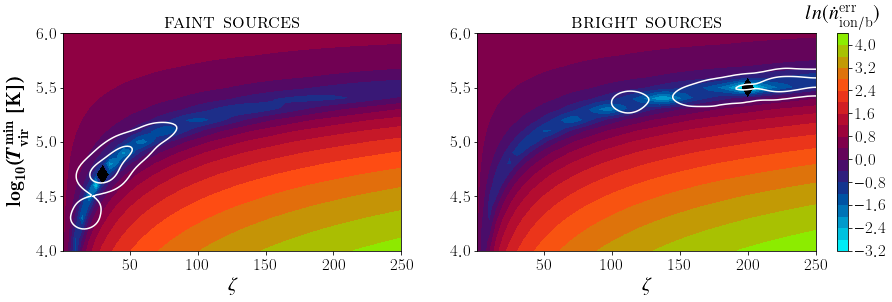

In [130]:

zeta = np.linspace(0,250,num=51)
#print zeta
tvir = np.linspace(4.,6.,num=21)
rmfp = np.linspace(5.,25.,num=11)
zeta[0]+=1
# plt.colorbar()
from mpl_toolkits.axes_grid1 import ImageGrid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), 
                  gridspec_kw={"width_ratios":[1,1.25]})

#cmap = 'rainbow_r'

levels =[0.39,0.86]
rangee = [[1., 250.], [4., 6.]]
# Add data to image grid
#for ax in grid:
#    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

law_err = np.zeros((len(tvir), len(zeta)))
print tvir[7], zeta[6]
for j in np.arange(len(tvir)):
    j = int(j)
    for i in np.arange(len(zeta)):
        i = int(i)
        law_err[j][i] = np.sqrt(((law[0][7][6]-law[0][j][i])**2/law[0][7][6]**2)+\
                          ((law[1][7][6]-law[1][j][i])**2/law[1][7][6]**2)+\
                            ((law[2][7][6]-law[2][j][i])**2/law[2][7][6]**2)   )

#law_err[ law_err>3] = 3        
D = np.loadtxt('../../Results_all/fixed_noise_paper_res/30_hii_all/chains_30_hii_all.txt')
k = scipy.stats.kde.gaussian_kde(D[:,:2].T)
xi, yi = np.mgrid[1:250:150*1j, 4.:6.:150*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
#axes[0].imshow(np.log(law_err), cmap = cmap, interpolation= 'kaiser', extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)],\
#                    aspect='auto',origin='lower')#
axes[0].contourf(X,Y, np.log(law_err),20, cmap=cmap)
H, XX, YY = np.histogram2d(
            D[:,0].flatten(),
            D[:,1].flatten(),
            bins=150,
            range=list(map(np.sort, rangee)),
            weights=np.ones(len(D))/len(D),
        )
H = scipy.ndimage.gaussian_filter(H, 5)
Hflat = H.flatten()
inds = np.argsort(Hflat)[::-1]
Hflat = Hflat[inds]
sm = np.cumsum(Hflat)
sm /= sm[-1]
V = np.empty(len(levels))
for i, v0 in enumerate(levels):
    try:
        V[i] = Hflat[sm <= v0][-1]
    except IndexError:
        V[i] = Hflat[0]
V.sort()
m = np.diff(V) == 0

while np.any(m):
    V[np.where(m)[0][0]] *= 1.0 - 1e-4
    m = np.diff(V) == 0
V.sort()

# Compute the bin centers.
X1, Y1 = 0.5 * (XX[1:] + XX[:-1]), 0.5 * (YY[1:] + YY[:-1])

# Extend the array for the sake of the contours at the plot edges.
H2 = H.min() + np.zeros((H.shape[0] + 4, H.shape[1] + 4))
H2[2:-2, 2:-2] = H
H2[2:-2, 1] = H[:, 0]
H2[2:-2, -2] = H[:, -1]
H2[1, 2:-2] = H[0]
H2[-2, 2:-2] = H[-1]
H2[1, 1] = H[0, 0]
H2[1, -2] = H[0, -1]
H2[-2, 1] = H[-1, 0]
H2[-2, -2] = H[-1, -1]
X2 = np.concatenate(
    [
        X1[0] + np.array([-2, -1]) * np.diff(X1[:2]),
        X1,
        X1[-1] + np.array([1, 2]) * np.diff(X1[-2:]),
    ]
)
Y2 = np.concatenate(
    [
        Y1[0] + np.array([-2, -1]) * np.diff(Y1[:2]),
        Y1,
        Y1[-1] + np.array([1, 2]) * np.diff(Y1[-2:]),
    ]
)
cs  =axes[0].contour(X2, Y2, H2.T, V, colors='w')

#cs = axes[0].contour(xi, yi, zi.reshape(xi.shape), levels=[0.03,0.15] , colors='k')


axes[0].set_ylim(4,6)
axes[0].set_xlim(1,250)


D = np.loadtxt('../../Results_all/fixed_noise_paper_res/200_hii_all/chains_200_hii_all.txt')
k = scipy.stats.kde.gaussian_kde(D[:,:2].T, bw_method = 0.1)
xi, yi = np.mgrid[1:250:150*1j, 4.:6.:150*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

for j in np.arange(len(tvir)):
    j = int(j)
    for i in np.arange(len(zeta)):
        i = int(i)
        law_err[j][i] = np.sqrt(((law[0][15][40]-law[0][j][i])**2/law[0][15][40]**2)+\
                          ((law[1][15][40]-law[1][j][i])**2/law[1][15][40]**2)+\
                            ((law[2][15][40]-law[2][j][i])**2/law[2][15][40]**2)   )
        
#law_err[ law_err>3] = 3       
#zi = scipy.ndimage.gaussian_filter(zi, 5)
clf = axes[1].contourf(X,Y, np.log(law_err),20,cmap = cmap)
clb = fig.colorbar(clf)
clb.ax.set_title(r'$ln(\dot{n}_{\rm ion/b}^{\rm err})$', fontsize = 20)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(1,250)

H, XX, YY = np.histogram2d(
            D[:,0].flatten(),
            D[:,1].flatten(),
            bins=150,
            range=list(map(np.sort, rangee)),
            weights=np.ones(len(D))/len(D),
        )
H = scipy.ndimage.gaussian_filter(H, 4)
Hflat = H.flatten()
inds = np.argsort(Hflat)[::-1]
Hflat = Hflat[inds]
sm = np.cumsum(Hflat)
sm /= sm[-1]
V = np.empty(len(levels))
for i, v0 in enumerate(levels):
    try:
        V[i] = Hflat[sm <= v0][-1]
    except IndexError:
        V[i] = Hflat[0]
V.sort()
m = np.diff(V) == 0

while np.any(m):
    V[np.where(m)[0][0]] *= 1.0 - 1e-4
    m = np.diff(V) == 0
V.sort()

# Compute the bin centers.
X1, Y1 = 0.5 * (XX[1:] + XX[:-1]), 0.5 * (YY[1:] + YY[:-1])

# Extend the array for the sake of the contours at the plot edges.
H2 = H.min() + np.zeros((H.shape[0] + 4, H.shape[1] + 4))
H2[2:-2, 2:-2] = H
H2[2:-2, 1] = H[:, 0]
H2[2:-2, -2] = H[:, -1]
H2[1, 2:-2] = H[0]
H2[-2, 2:-2] = H[-1]
H2[1, 1] = H[0, 0]
H2[1, -2] = H[0, -1]
H2[-2, 1] = H[-1, 0]
H2[-2, -2] = H[-1, -1]
X2 = np.concatenate(
    [
        X1[0] + np.array([-2, -1]) * np.diff(X1[:2]),
        X1,
        X1[-1] + np.array([1, 2]) * np.diff(X1[-2:]),
    ]
)
Y2 = np.concatenate(
    [
        Y1[0] + np.array([-2, -1]) * np.diff(Y1[:2]),
        Y1,
        Y1[-1] + np.array([1, 2]) * np.diff(Y1[-2:]),
    ]
)
axes[1].contour(X2, Y2, H2.T, V, colors='w')


axes[0].set_xlabel(r'$\zeta$', fontsize = 20)
axes[1].set_xlabel(r'$\zeta$', fontsize = 20)
axes[0].set_ylabel(r'\boldmath${\rm log}_{10}(T^{\rm min}_{\rm vir}\ [{\rm K}])$', fontsize = 20)
axes[0].set_title(r"\textsc{faint sources}", fontsize = 20)
axes[1].set_title(r"\textsc{bright sources}", fontsize = 20)
axes[1].set_facecolor("black")
axes[0].set_facecolor("black")

axes[0].tick_params(axis = 'both', which = 'major', labelsize = 17)  
axes[1].tick_params(axis = 'both', which = 'major', labelsize = 17)  

#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.savefig('Nion.pdf', bbox_inches='tight')

plt.show()

In [ ]:
import matplotlib.colors

cmap = plt.cm.rainbow_r
cmaplist = [cmap(i) for i in range(cmap.N)]
for i in range(len(cmaplist)):
    cmaplist[i] = (1-cmaplist[i][0], 1-cmaplist[i][1],1-cmaplist[i][2], 1.)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)


/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice


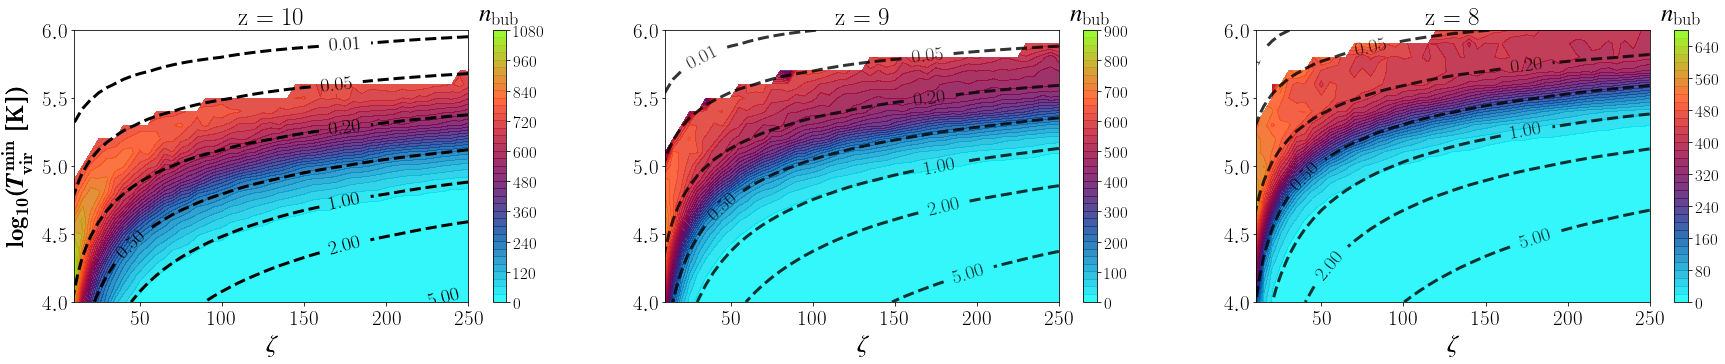

In [105]:
X, Y = np.meshgrid(zeta, tvir)
nbins = 40
#cmap = 'rainbow'
plt.figure(figsize=(30,5))
sigma = 0.
plt.subplot(1, 3, 1)
curbub =tot_bub_10# total_bub#tot_bub_10
#print curbub
test_bub = np.nanmean(curbub[:,:,:,2], axis = 2)
#test_bub /= np.max(test_bub)
#print test_bub
Z2 = scipy.ndimage.gaussian_filter(test_bub.T, sigma=sigma, order=0)
plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)

clb = plt.colorbar()
clb.ax.set_title(r'$n_{\rm bub}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 


plt.xlabel(r'$\zeta$', fontsize = 25)
plt.ylabel(r'\boldmath${\rm log}_{10}(T^{\rm min}_{\rm vir}\ [{\rm K}])$', fontsize = 25)
plt.title("z = 10", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      
cp = plt.contour(X,Y, law[0],[0.01,0.05,0.2,0.5,1,2,5],alpha = 1., colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[0]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
plt.ylim(4,6)
plt.xlim(10,250)

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')
plt.subplot(1, 3, 2)
test_bub = np.nanmean(curbub[:,:,:,1], axis = 2)
#test_bub /= np.max(test_bub)

Z2 = scipy.ndimage.gaussian_filter(test_bub.T, sigma=sigma, order=0)
plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)
clb = plt.colorbar()
clb.ax.set_title(r'$n_{\rm bub}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)
plt.xlabel(r'$\zeta$', fontsize = 25)
#plt.ylabel(r'\boldmath${\rm log}_{10}(T^{\rm min}_{\rm vir}\ [{\rm K}])$', fontsize = 17)
plt.title("z = 9", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      
cp = plt.contour(X,Y, law[1],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[0]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')
plt.subplot(1, 3, 3)
test_bub = np.nanmean(curbub[:,:,:,0], axis = 2)
#test_bub /= np.max(test_bub)

Z2 = scipy.ndimage.gaussian_filter(test_bub.T, sigma=sigma, order=0)
plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)
#plt.contourf(X,Y, np.mean(curbub[:,:,:,1], axis = 2).T, nbins, cmap='Blues', alpha = 0.5)
#plt.contourf(X,Y, np.mean(curbub[:,:,:,2], axis = 2).T, nbins, cmap='Greens', alpha = 0.5)

#plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.5)

clb = plt.colorbar()
clb.ax.set_title(r'$n_{\rm bub}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
#plt.ylabel(r'\boldmath${\rm log}_{10}(T^{\rm min}_{\rm vir}\ [{\rm K}])$', fontsize = 17)
plt.title("z = 8", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      
cp = plt.contour(X,Y, law[2],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[0]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')
plt.savefig('Nbub_colormap_seen.pdf', bbox_inches='tight')




/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: Mean of empty slice


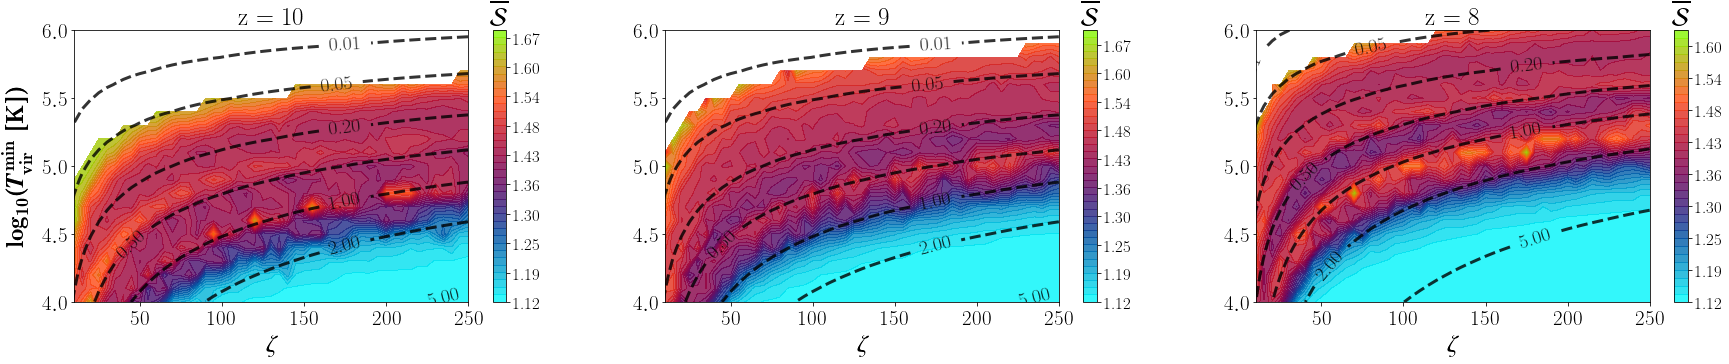

In [110]:
plt.figure(figsize=(30,5))
sigma = 0.1
#cmap = 'rainbow'
nbins=40
plt.subplot(1, 3, 1)
spa_arr = np.round(model_ave_10[:,:,:,:,3],3)
test_spa = np.nanmean(spa_arr[:,:,:,2], axis = 2)
#test_bub /= np.max(test_bub)
#print test_bub
#plt.contourf(X,Y, test_spa.T, nbins, cmap=cmap, alpha = 0.8)

Z2 = scipy.ndimage.gaussian_filter(test_spa.T, sigma=sigma, order=0)
#Z2 = (Z2 - np.min(Z2))/(np.max(Z2)- np.min(Z2))
#clev = np.arange(np.min(Z2),np.max(Z2),.001) #Adjust the .001 to get finer gradient

plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)

#plt.imshow(Z2, cmap=cmap,origin='lower', 
#           extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)],interpolation='none',  aspect='auto')
#plt.imshow(Z2, cmap=cmap,origin='lower', 
#           extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)],interpolation='kaiser',  aspect='auto')
clb = plt.colorbar(format='%.2f')

clb.ax.set_title(r'$ \overline{\mathcal{S}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 

plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.ylabel(r'\boldmath${\rm log}_{10}(T^{\rm min}_{\rm vir}\ [{\rm K}])$', fontsize = 25)
plt.title("z = 10", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      
cp = plt.contour(X,Y, law[0],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[0]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')
#





plt.subplot(1, 3, 2)
test_spa = np.nanmean(spa_arr[:,:,:,1], axis = 2)
#test_bub /= np.max(test_bub)

#plt.contourf(X,Y, test_spa.T, nbins, cmap=cmap, alpha = 0.8)

Z2 = scipy.ndimage.gaussian_filter(test_spa.T, sigma=sigma, order=0)
#Z2 = (Z2 - np.min(Z2))/(np.max(Z2)- np.min(Z2))

plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)

#plt.imshow(Z2, cmap=cmap,origin='lower', 
#           extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)],interpolation='none',  aspect='auto')


#plt.imshow(Z2, cmap=cmap,origin='lower', 
#           extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)],interpolation='kaiser',  aspect='auto')

clb = plt.colorbar(format='%.2f')

clb.ax.set_title(r'$ \overline{\mathcal{S}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 9", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      

cp = plt.contour(X,Y, law[0],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[1]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')# plt.axvline(x=30)



plt.subplot(1, 3, 3)
test_spa = np.nanmean(spa_arr[:,:,:,0], axis = 2)
#test_bub /= np.max(test_bub)
#plt.contourf(X,Y, test_spa.T, nbins, cmap=cmap, alpha = 0.8)

Z2 = scipy.ndimage.gaussian_filter(test_spa.T, sigma=sigma, order=0)
#Z2 = (Z2 - np.min(Z2))/(np.max(Z2)- np.min(Z2))

plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)

#plt.imshow(Z2, cmap=cmap,origin='lower', 
#           extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)],interpolation='kaiser',  aspect='auto')
clb = plt.colorbar(format='%.2f')

clb.ax.set_title(r'$ \overline{\mathcal{S}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 8", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      
cp = plt.contour(X,Y, law[2],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')# plt.axvline(x=30)
plt.savefig('Spars_colormap_seen.pdf', bbox_inches='tight')


/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice


0.25
250.0
4.0


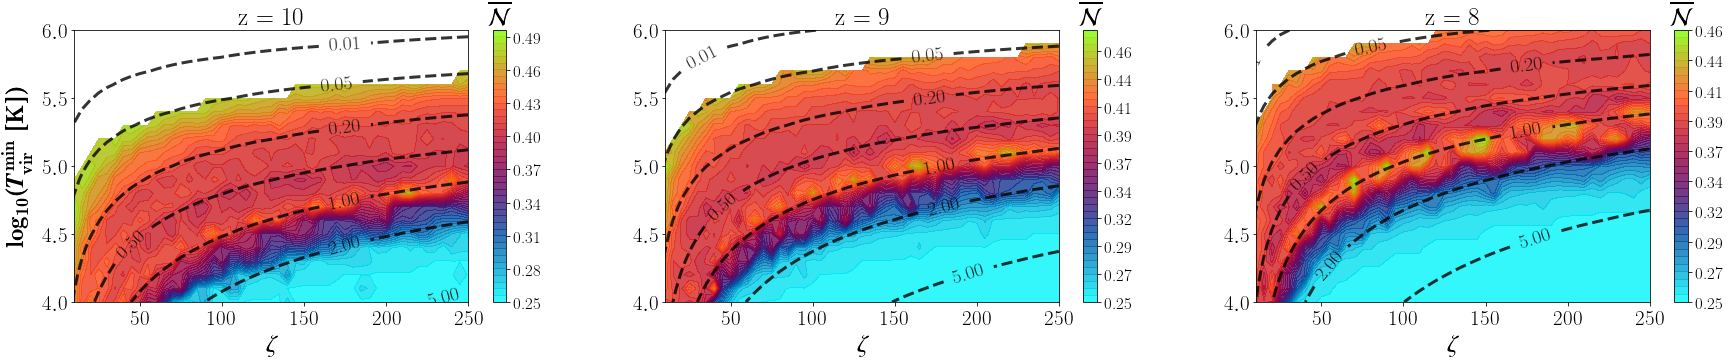

In [111]:
plt.figure(figsize=(30,5))
sigma = 0.
nbins=40
plt.subplot(1, 3, 1)
nco_arr = np.round(model_ave_10[:,:,:,:,4],2)
test_nco = np.nanmean(nco_arr[:,:,:,2], axis = 2)

#test_bub /= np.max(test_bub)
#print test_bub
Z2 = scipy.ndimage.gaussian_filter(test_nco.T, sigma=sigma, order=0)
#Z2 = (Z2 - np.min(Z2))/(np.max(Z2)- np.min(Z2))
plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)
clb = plt.colorbar(format='%.2f')

clb.ax.set_title(r'$ \overline{\mathcal{N}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 10", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      
plt.ylabel(r'\boldmath${\rm log}_{10}(T^{\rm min}_{\rm vir}\ [{\rm K}])$', fontsize = 25)
cp = plt.contour(X,Y, law[0],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')


plt.subplot(1, 3, 2)
test_nco = np.nanmean(nco_arr[:,:,:,1], axis = 2)
#test_bub /= np.max(test_bub)
print test_nco[-1,0]
print zeta[-1]
print tvir[0]
Z2 = test_nco.T
#Z2 = (Z2 - np.min(Z2))/(np.max(Z2)- np.min(Z2))

plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)
clb = plt.colorbar(format='%.2f')

clb.ax.set_title(r'$ \overline{\mathcal{N}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 9", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      
cp = plt.contour(X,Y, law[1],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')


plt.subplot(1, 3, 3)
test_nco = np.nanmean(nco_arr[:,:,:,0], axis = 2)
#test_bub /= np.max(test_bub)

Z2 = scipy.ndimage.gaussian_filter(test_nco.T, sigma=sigma, order=0)
#Z2 = (Z2 - np.min(Z2))/(np.max(Z2)- np.min(Z2))

plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)
clb = plt.colorbar(format='%.2f')

clb.ax.set_title(r'$ \overline{\mathcal{N}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 8", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      
cp = plt.contour(X,Y, law[2],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')



plt.savefig('Ncomp_colormap_seen.pdf', bbox_inches='tight')


/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: Mean of empty slice


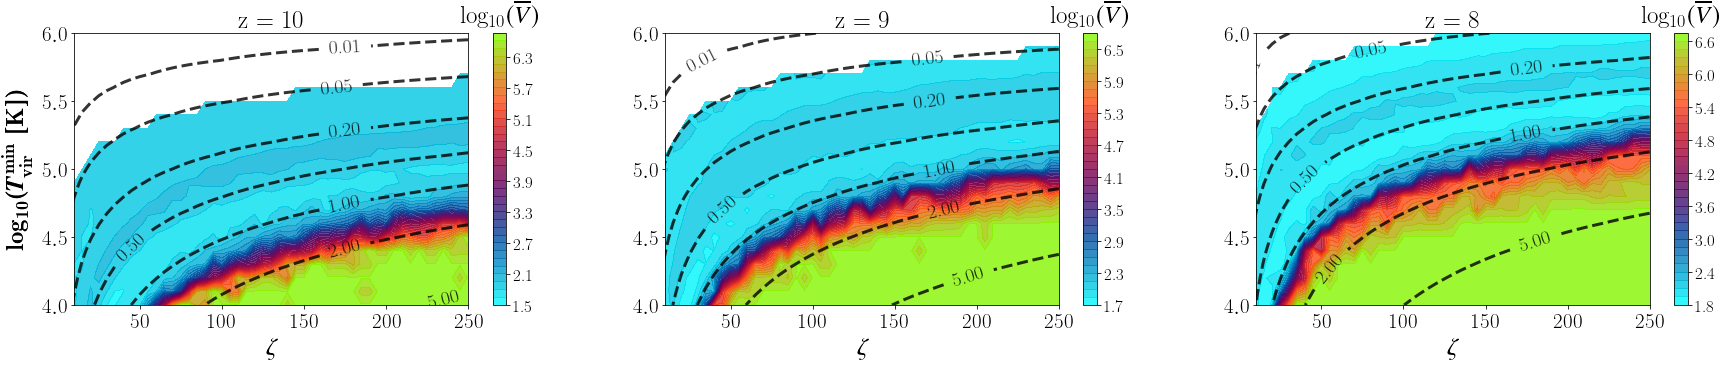

In [112]:
import astropy
from astropy.convolution import Gaussian2DKernel


# astropy's convolution replaces the NaN pixels with a kernel-weighted
# interpolation from their neighbors

plt.figure(figsize=(30,5))
sigma = 0.05
kernel = Gaussian2DKernel(sigma)

nbins=40
plt.subplot(1, 3, 1)
vol_arr = model_ave_10[:,:,:,:,0]
test_vol = np.nanmean(vol_arr[:,:,:,2], axis = 2)
#test_bub /= np.max(test_bub)
#print test_bub
#cmap = 'rainbow'#matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))

Z2 = astropy.convolution.convolve(test_vol.T, kernel, boundary ='extend')
# scipy.ndimage.gaussian_filter(test_vol.T, sigma=sigma, order=0)
#Z2 = (Z2 - np.min(Z2))/(np.max(Z2)- np.min(Z2))

#Z2[Z2>2] = 2
plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)
clb = plt.colorbar(format='%.1f')

clb.ax.set_title(r'log$_{10}(\overline{V})$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 10", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      

plt.ylabel(r'\boldmath${\rm log}_{10}(T^{\rm min}_{\rm vir}\ [{\rm K}])$', fontsize = 25)
cp = plt.contour(X,Y, law[0],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')

plt.subplot(1, 3, 2)
test_vol = np.nanmean(vol_arr[:,:,:,1], axis = 2)
#test_bub /= np.max(test_bub)

Z2 = astropy.convolution.convolve(test_vol.T, kernel, boundary ='extend')
#Z2 = (Z2 - np.min(Z2))/(np.max(Z2)- np.min(Z2))

#Z2[Z2>2] = 2

plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)
clb = plt.colorbar(format='%.1f')

clb.ax.set_title(r'log$_{10}(\overline{V})$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 9", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      
cp = plt.contour(X,Y, law[1],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')

plt.subplot(1, 3, 3)
test_vol = np.nanmean(vol_arr[:,:,:,0], axis = 2)
#test_bub /= np.max(test_bub)

Z2 = astropy.convolution.convolve(test_vol.T, kernel, boundary ='extend',preserve_nan=True)
#Z2 = (Z2 - np.min(Z2))/(np.max(Z2)- np.min(Z2))

#Z2[Z2>2] = 2

plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)
clb = plt.colorbar(format='%.1f')

clb.ax.set_title(r'log$_{10}(\overline{V})$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 8", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      
cp = plt.contour(X,Y, law[2],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')


plt.savefig('Volume_colormap_seen.pdf', bbox_inches='tight')


/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: Mean of empty slice


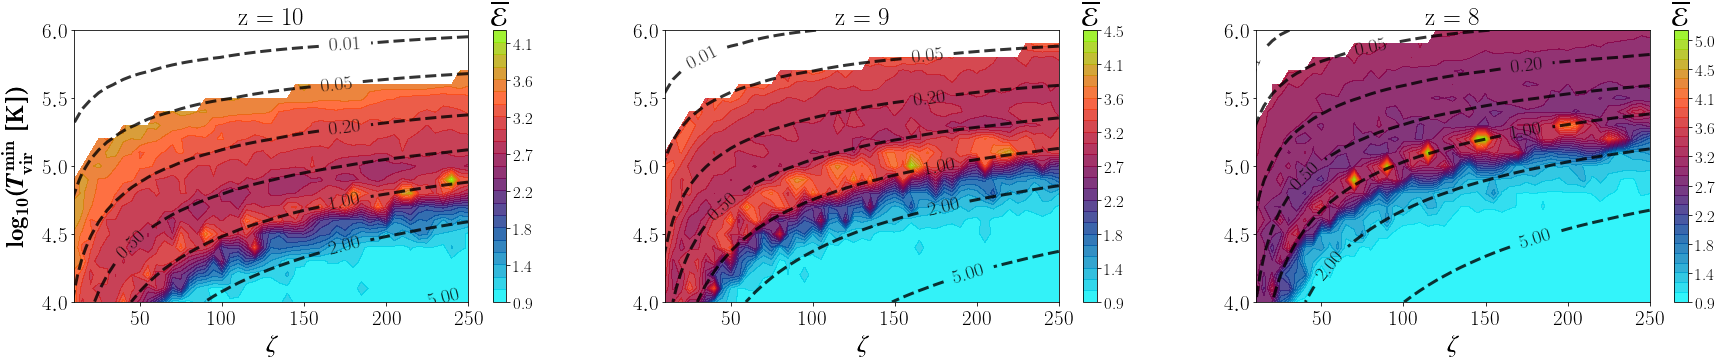

In [123]:
#cmap = 'rainbow'
plt.figure(figsize=(30,5))
sigma = 0.1
nbins=30
plt.subplot(1,3, 1)
elo_arr = model_ave_10[:,:,:,:,1]
test_elo = np.nanmean(elo_arr[:,:,:,2], axis = 2)
#test_bub /= np.max(test_bub)
#print test_bub
Z2 = scipy.ndimage.gaussian_filter(test_elo.T, sigma=sigma, order=0)
plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)

clb = plt.colorbar(format='%.1f')

clb.ax.set_title(r'$ \overline{\mathcal{E}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)
plt.ylabel(r'\boldmath${\rm log}_{10}(T^{\rm min}_{\rm vir}\ [{\rm K}])$', fontsize = 25)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 10", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      

cp = plt.contour(X,Y, law[0],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')

plt.subplot(1, 3, 2)
test_elo = np.nanmean(elo_arr[:,:,:,1], axis = 2)
#test_bub /= np.max(test_bub)

Z2 = scipy.ndimage.gaussian_filter(test_elo.T, sigma=sigma, order=0)
plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)

clb = plt.colorbar(format='%.1f')

clb.ax.set_title(r'$ \overline{\mathcal{E}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 9", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      

cp = plt.contour(X,Y, law[1],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')

plt.subplot(1, 3, 3)

test_elo = np.nanmean(elo_arr[:,:,:,0], axis = 2)
test_elo[test_elo > 5] = 5.
#test_bub /= np.max(test_bub)

Z2 = scipy.ndimage.gaussian_filter(test_elo.T, sigma=sigma, order=0)
plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)

clb = plt.colorbar(format='%.1f')

clb.ax.set_title(r'$ \overline{\mathcal{E}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 8", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      

cp = plt.contour(X,Y, law[2],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')



plt.savefig('Elong_colormap_seen.pdf', bbox_inches='tight')


/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice


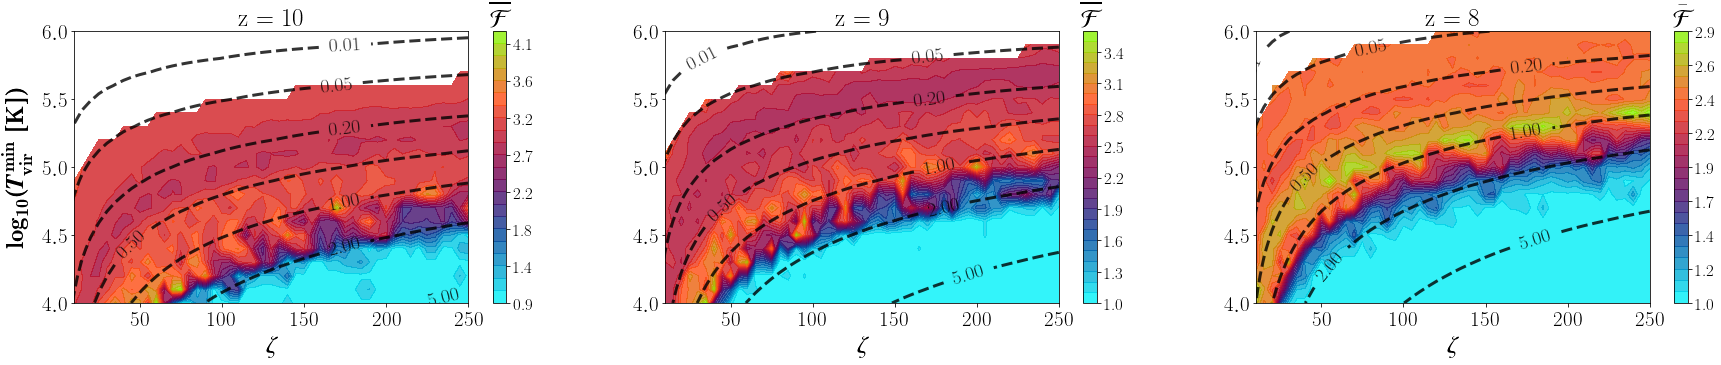

In [124]:
plt.figure(figsize=(30,5))
sigma = 0.1
nbins=30
plt.subplot(1, 3, 1)
fla_arr = model_ave_10[:,:,:,:,2]
test_fla = np.nanmean(fla_arr[:,:,:,2], axis = 2)

#test_bub /= np.max(test_bub)
#print test_bub
Z2 = scipy.ndimage.gaussian_filter(test_fla.T, sigma=sigma, order=0, mode='nearest')

plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)
clb = plt.colorbar(format='%.1f')

clb.ax.set_title(r'$ \overline{\mathcal{F}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 10", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      

cp = plt.contour(X,Y, law[0],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')
plt.ylabel(r'\boldmath${\rm log}_{10}(T^{\rm min}_{\rm vir}\ [{\rm K}])$', fontsize = 25)

plt.subplot(1, 3, 2)
test_fla = np.nanmean(fla_arr[:,:,:,1], axis = 2)
#test_bub /= np.max(test_bub)

Z2 = scipy.ndimage.gaussian_filter(test_fla.T, sigma=sigma, order=0)
plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)

clb = plt.colorbar(format='%.1f')

clb.ax.set_title(r'$ \overline{\mathcal{F}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 9", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      

cp = plt.contour(X,Y, law[1],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')
# plt.axvline(x=30)
# plt.axhline(y=4.7)
# plt.axvline(x=200)
# plt.axhline(y=5.48)
plt.subplot(1, 3, 3)
test_fla = np.nanmean(fla_arr[:,:,:,0], axis = 2)
#test_bub /= np.max(test_bub)

Z2 = scipy.ndimage.gaussian_filter(test_fla.T, sigma=sigma, order=0)
plt.contourf(X,Y, Z2, nbins, cmap=cmap, alpha = 0.8)

clb = plt.colorbar(format='%.1f')

clb.ax.set_title(r'$ \bar{\mathcal{F}}$', fontsize = 25)
clb.ax.tick_params(labelsize=17) 
plt.ylim(4,6)
plt.xlim(10,250)

plt.xlabel(r'$\zeta$', fontsize = 25)
plt.title("z = 8", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 21)      

cp = plt.contour(X,Y, law[2],[0.01,0.05,0.2,0.5,1,2,5],alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')
#cp = plt.contour(X,Y, np.log10(law[2]),10,alpha = 0.8, colors= 'k', linewidths=3,linestyles='dashed')

plt.clabel(cp, inline=True,  fontsize=20,inline_spacing=10,fmt ='%1.2f')


plt.savefig('Flat_colormap_seen.pdf', bbox_inches='tight')

